# **Project Name**    - Bus Demand Prediction

##### **Project Type**    - Regression
##### **Team Member 1 - Thamizharasu**
##### **Team Member 2 - Aadhithya**
##### **Team Member 3 - Lourdu Radjou**
##### **Team Member 4 - Daryl Adrien**
##### **Team Member 5 - Vijayalakshmi**
##### **Team Member 6 - Marilyn**

# **Project Summary**

In summary, the project aims to create a model that predicts the number of seats sold for each ride on specific routes, dates, and times for DTC. The routes originate from cities and connect to Delhi. Passengers are influenced by traffic conditions during their travel into the city and onward to their final destinations in Delhi. Understanding these patterns can help improve service planning and optimize operations for DTC.

To enhance the performance of the model, additional features have been generated. These new features aim to provide more relevant information and contribute to improved predictions. The dataset has been subjected to testing using multiple regression models. These models have been employed to analyze the data and derive insights, allowing for a comprehensive evaluation of the predictive capabilities. The most significant features identified by the model are highlighted and displayed. These key features play a crucial role in determining the number of seats sold for each ride. By showcasing these important factors, stakeholders can gain a better understanding of the influential elements driving seat sales.

# **GitHub Link -**

https://github.com/THAMIZH-ARASU/Bus_Demand_Prediction

## **Import Libraries**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## **Dataset Loading**

In [296]:
df = pd.read_csv('demand_prediction_Data.csv')

In [297]:
df.head()

,ride_id,seat_number,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_from_to
0,1234,12,2/20/2024,8:00,Mumbai,Delhi,bus,50,Mumbai to Delhi
1,5678,28,2/22/2024,10:00,Kolkata,Delhi,shuttle,30,Kolkata to Delhi
2,3456,18,2/26/2024,12:00,Bangalore,Delhi,shuttle,30,Bangalore to Delhi
3,7890,25,2/28/2024,14:00,Hyderabad,Delhi,bus,50,Hyderabad to Delhi
4,6789,38,3/3/2024,16:00,Lucknow,Delhi,bus,50,Lucknow to Delhi


In [298]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 384 rows and 9 columns


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ride_id         384 non-null    int64 
 1   seat_number     384 non-null    int64 
 2   travel_date     384 non-null    object
 3   travel_time     384 non-null    object
 4   travel_from     384 non-null    object
 5   travel_to       384 non-null    object
 6   car_type        384 non-null    object
 7   max_capacity    384 non-null    int64 
 8   travel_from_to  384 non-null    object
dtypes: int64(3), object(6)
memory usage: 27.1+ KB


In [300]:
df['seat_number'] = df['seat_number'].astype('object')

In [301]:
df.duplicated().value_counts()

False    384
Name: count, dtype: int64

In [302]:
df.isnull().sum()

ride_id           0
seat_number       0
travel_date       0
travel_time       0
travel_from       0
travel_to         0
car_type          0
max_capacity      0
travel_from_to    0
dtype: int64

In the above data:
1. There are no duplicate rows
2. There are no null values

In [303]:
df.columns

Index(['ride_id', 'seat_number', 'travel_date', 'travel_time', 'travel_from',
       'travel_to', 'car_type', 'max_capacity', 'travel_from_to'],
      dtype='object')

In [304]:
df.describe()

,ride_id,max_capacity
count,384.000000,384.000000
mean,10444.536458,40.416667
std,16486.983655,10.004351
min,1000.000000,30.000000
25%,1288.750000,30.000000
50%,4211.000000,50.000000
75%,9015.250000,50.000000
max,90036.000000,50.000000


In [305]:
df.describe(include='object')

,seat_number,travel_date,travel_time,travel_from,travel_to,car_type,travel_from_to
count,384,384,384,384,384,384,384
unique,50,240,124,107,6,2,153
top,48,4/17/2024,9:00,Kolkata,Delhi,bus,Kolkata to Delhi
freq,13,4,9,33,298,200,13


In [306]:
df.describe(include='object').iloc[1,:]

seat_number        50
travel_date       240
travel_time       124
travel_from       107
travel_to           6
car_type            2
travel_from_to    153
Name: unique, dtype: object

In [307]:
df.head(3)

,ride_id,seat_number,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_from_to
0,1234,12,2/20/2024,8:00,Mumbai,Delhi,bus,50,Mumbai to Delhi
1,5678,28,2/22/2024,10:00,Kolkata,Delhi,shuttle,30,Kolkata to Delhi
2,3456,18,2/26/2024,12:00,Bangalore,Delhi,shuttle,30,Bangalore to Delhi


In [308]:
len(df['ride_id'].unique())

277

In [309]:
temp_df = df.groupby('ride_id')['seat_number'].count().reset_index()
temp_df.rename(columns = {'seat_number':'number_of_tickets'}, inplace = True)
temp_df.head()
    

,ride_id,number_of_tickets
0,1000,1
1,1001,2
2,1002,1
3,1003,1
4,1004,1


In [310]:
df.drop(['seat_number'], axis = 1, inplace = True)
df.shape

(384, 8)

In [311]:
df.drop_duplicates('ride_id', inplace=True)
df.shape

(277, 8)

In [312]:
df = df.merge(temp_df, how='left', on='ride_id')
df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_from_to,number_of_tickets
0,1234,2/20/2024,8:00,Mumbai,Delhi,bus,50,Mumbai to Delhi,5
1,5678,2/22/2024,10:00,Kolkata,Delhi,shuttle,30,Kolkata to Delhi,2
2,3456,2/26/2024,12:00,Bangalore,Delhi,shuttle,30,Bangalore to Delhi,4
3,7890,2/28/2024,14:00,Hyderabad,Delhi,bus,50,Hyderabad to Delhi,4
4,6789,3/3/2024,16:00,Lucknow,Delhi,bus,50,Lucknow to Delhi,8


In [313]:
df['travel_date'] = pd.to_datetime(df['travel_date'], format='mixed', dayfirst=True, errors='coerce')
df['travel_date'] = df['travel_date'].dt.strftime('%d-%m-%y')
df['travel_date']

0      20-02-24
1      22-02-24
2      26-02-24
3      28-02-24
4      03-03-24
         ...   
272    19-06-24
273    20-06-24
274    21-06-24
275    22-06-24
276    23-06-24
Name: travel_date, Length: 277, dtype: object

In [314]:
df['date_time'] = pd.to_datetime(df['travel_date'] +" "+ df['travel_time'], format='mixed')
df['date_time']

0     2024-02-20 08:00:00
1     2024-02-22 10:00:00
2     2024-02-26 12:00:00
3     2024-02-28 14:00:00
4     2024-03-03 16:00:00
              ...        
272   2024-06-19 07:00:00
273   2024-06-20 08:00:00
274   2024-06-21 09:00:00
275   2024-06-22 10:00:00
276   2024-06-23 11:00:00
Name: date_time, Length: 277, dtype: datetime64[ns]

In [315]:
df['travel_date'] = pd.to_datetime(df['travel_date'], dayfirst= True)
df['travel_date']

0     2024-02-20
1     2024-02-22
2     2024-02-26
3     2024-02-28
4     2024-03-03
         ...    
272   2024-06-19
273   2024-06-20
274   2024-06-21
275   2024-06-22
276   2024-06-23
Name: travel_date, Length: 277, dtype: datetime64[ns]

In [316]:
df_copy = df.copy()

In [317]:
def create_date_cols(df_temp):
    df_temp['travel_month'] = df_temp['travel_date'].dt.month
    df_temp['travel_year'] = df_temp['travel_date'].dt.year
    df_temp['travel_day_of_month'] = df_temp['travel_date'].dt.day
    df_temp['travel_day_of_year'] = df_temp['travel_date'].dt.dayofyear
    df_temp['travel_day_of_week'] = df_temp['travel_date'].dt.dayofweek
    df_temp['travel_hour'] = pd.to_datetime(df_temp['travel_time'], format='mixed').dt.hour
    df_temp['quarter'] = df_temp['travel_date'].dt.quarter
    df_temp['is_weekend'] = df_temp['travel_day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)
    
    return df_temp

def_copy = create_date_cols(df_copy)

In [318]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_from_to,number_of_tickets,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend
0,1234,2024-02-20,8:00,Mumbai,Delhi,bus,50,Mumbai to Delhi,5,2024-02-20 08:00:00,2.0,2024.0,20.0,51.0,1.0,8,1.0,0
1,5678,2024-02-22,10:00,Kolkata,Delhi,shuttle,30,Kolkata to Delhi,2,2024-02-22 10:00:00,2.0,2024.0,22.0,53.0,3.0,10,1.0,0
2,3456,2024-02-26,12:00,Bangalore,Delhi,shuttle,30,Bangalore to Delhi,4,2024-02-26 12:00:00,2.0,2024.0,26.0,57.0,0.0,12,1.0,0
3,7890,2024-02-28,14:00,Hyderabad,Delhi,bus,50,Hyderabad to Delhi,4,2024-02-28 14:00:00,2.0,2024.0,28.0,59.0,2.0,14,1.0,0
4,6789,2024-03-03,16:00,Lucknow,Delhi,bus,50,Lucknow to Delhi,8,2024-03-03 16:00:00,3.0,2024.0,3.0,63.0,6.0,16,1.0,1


In [319]:
df_copy['travel_time'] = df_copy['travel_time'].str.split(':').apply(lambda x: round(int(x[0]) + int(x[1])/60 ,2) )

In [320]:
df_copy['travel_time']

0       8.0
1      10.0
2      12.0
3      14.0
4      16.0
       ... 
272     7.0
273     8.0
274     9.0
275    10.0
276    11.0
Name: travel_time, Length: 277, dtype: float64

In [321]:
def get_period(hour):
  if hour<7: return 'em'
  elif hour>=7 and hour<=11: return 'mor'
  elif hour>11 and hour<=15: return 'an'
  elif hour>15 and hour<=19: return 'evn'
  elif hour>19 and hour<=24: return 'nght'

df_copy['time_period_of_day'] = df_copy['travel_hour'].apply(get_period)

In [322]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_from_to,number_of_tickets,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day
0,1234,2024-02-20,8.0,Mumbai,Delhi,bus,50,Mumbai to Delhi,5,2024-02-20 08:00:00,2.0,2024.0,20.0,51.0,1.0,8,1.0,0,mor
1,5678,2024-02-22,10.0,Kolkata,Delhi,shuttle,30,Kolkata to Delhi,2,2024-02-22 10:00:00,2.0,2024.0,22.0,53.0,3.0,10,1.0,0,mor
2,3456,2024-02-26,12.0,Bangalore,Delhi,shuttle,30,Bangalore to Delhi,4,2024-02-26 12:00:00,2.0,2024.0,26.0,57.0,0.0,12,1.0,0,an
3,7890,2024-02-28,14.0,Hyderabad,Delhi,bus,50,Hyderabad to Delhi,4,2024-02-28 14:00:00,2.0,2024.0,28.0,59.0,2.0,14,1.0,0,an
4,6789,2024-03-03,16.0,Lucknow,Delhi,bus,50,Lucknow to Delhi,8,2024-03-03 16:00:00,3.0,2024.0,3.0,63.0,6.0,16,1.0,1,evn


1. Created target variable 'number_of_ticket'
2. Dropped constant and non essential columns
3. Used travel_date and travel_time columns to extract and create datetime related features
4. Created period feature from travel time for data visualization

### **Data Visualization**

In [323]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Distribution of tickets')

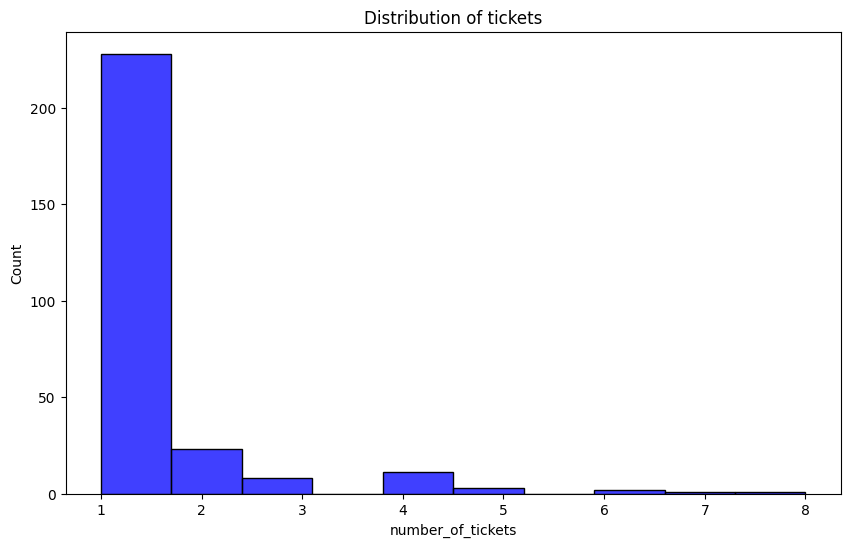

In [324]:
# Chart - 1 visualization code
#Histogram for distribution of tickets
plt.figure(figsize=(10,6))
sns.histplot(df_copy['number_of_tickets'], color='blue')
plt.title("Distribution of tickets")

In [325]:
# from data, usually number of tickets bought per ride_id is between 1 and 4

Text(0, 0.5, 'Count')

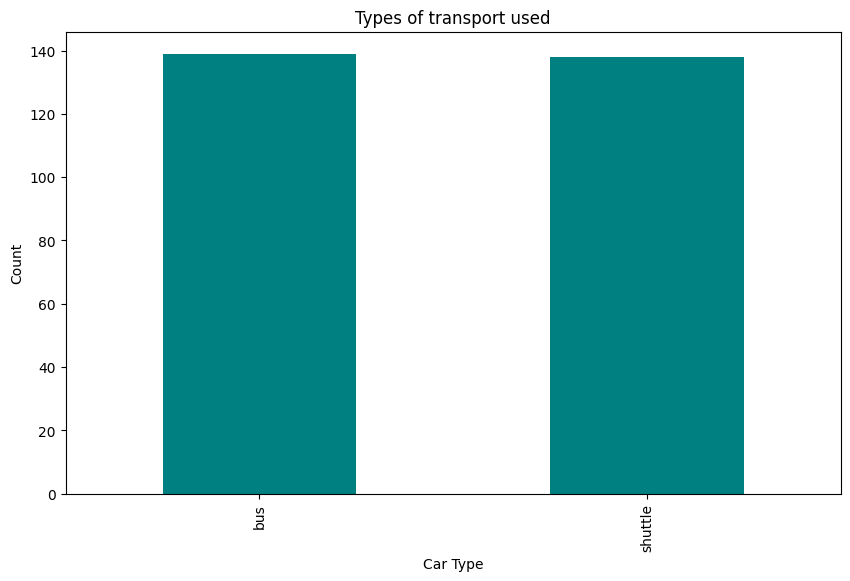

In [326]:
# Chart - 2 visualization code
#Bar chart for types of transport used
plt.figure(figsize=(10,6))
df_copy['car_type'].value_counts().plot(kind='bar',color='teal')
plt.title("Types of transport used")
plt.xlabel('Car Type')
plt.ylabel('Count')

In [327]:
# number of buses and shuttle are nearly equal in the data. hence, both type of vehicles are used equally for travelling

Text(0, 0.5, 'Count')

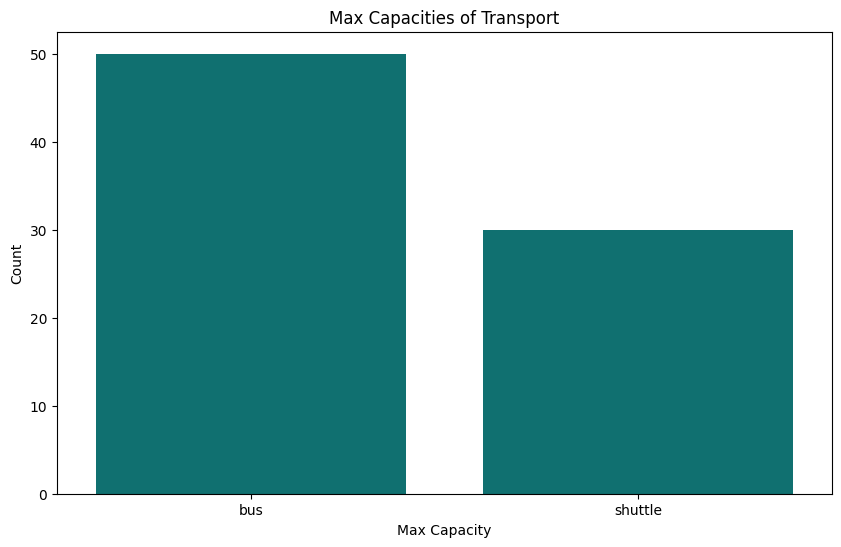

In [328]:
# Chart - 3 visualization code

#Bar chart for Max Capacities of transport
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy, x='car_type', y='max_capacity', color='teal')
plt.title("Max Capacities of Transport")
plt.xlabel('Max Capacity')
plt.ylabel('Count')

In [329]:
# Buses have Max capacity of 50, whereas max capacity of shuttle is 30

Text(0, 0.5, 'Number of Tickets')

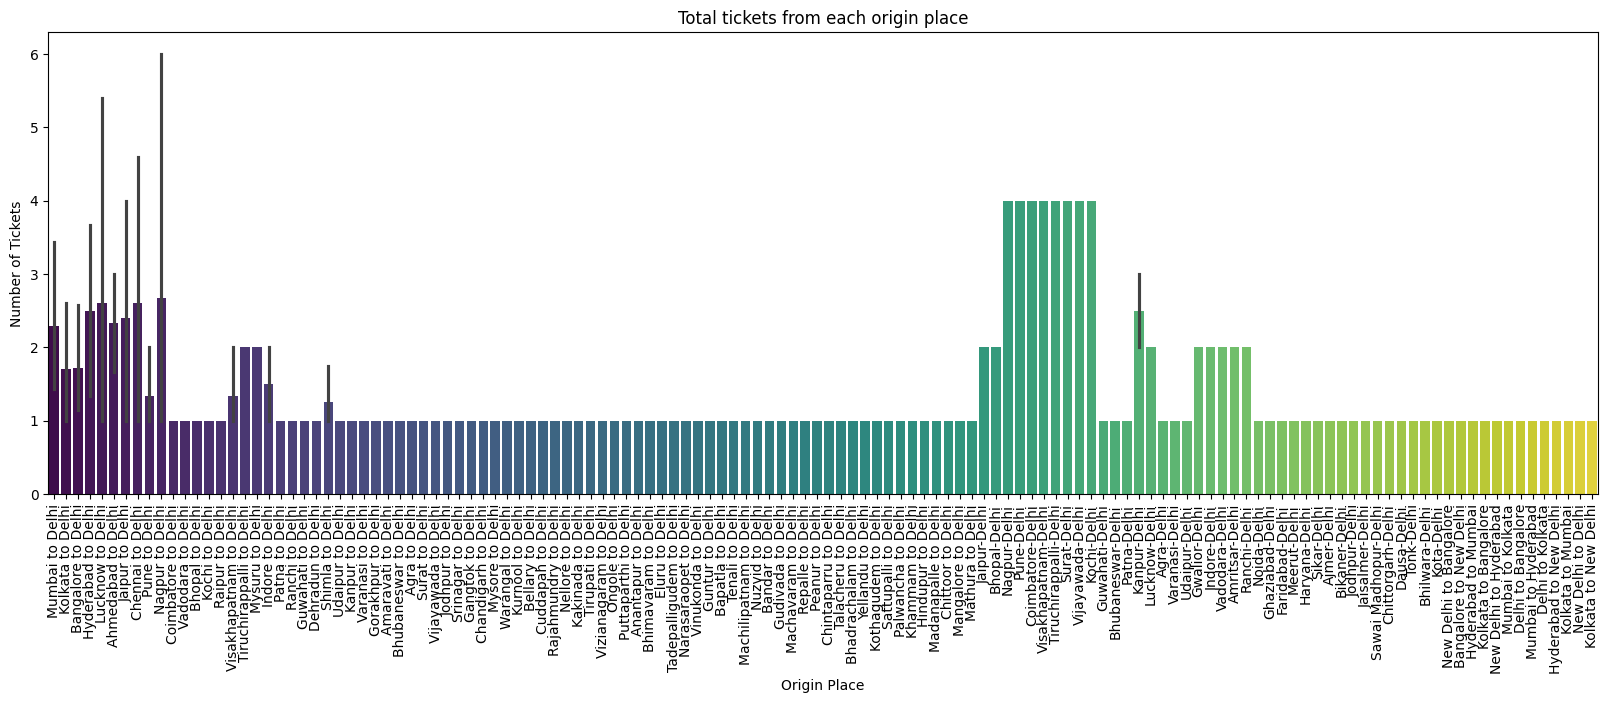

In [330]:
# Chart - 4 visualization code

#Bar chart for total number of ticket from each origin place
plt.figure(figsize=(20,6))
sns.barplot(data=df_copy,x='travel_from_to',y='number_of_tickets', palette='viridis')
plt.xticks(rotation=90)
plt.title('Total tickets from each origin place')
plt.xlabel('Origin Place')
plt.ylabel('Number of Tickets')

# Most number of tickets are sold from:

    1. Nagpur to Delhi
    2. Pune to Delhi
    3. Coimbatore to Delhi
    4. Vishakpatnam to Delhi
    5. Trichy to Delhi
    6. Surat to Delhi
    7. Vijayawada to Delhi
    8. Kochi to Delhi

Text(0, 0.5, 'Count')

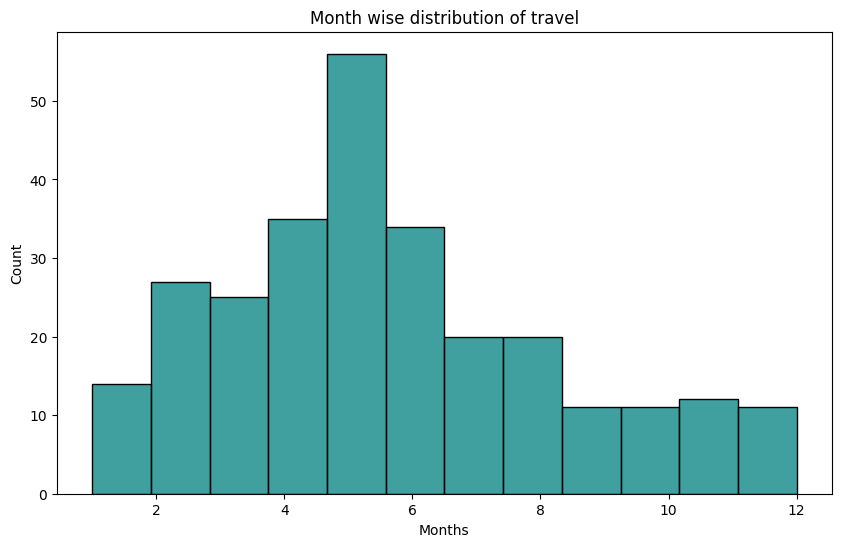

In [331]:
# Chart - 5 visualization code

#Monthwise Distribution of travellers

plt.figure(figsize=(10,6))
sns.histplot(df_copy['travel_month'],bins=12, color='teal')
plt.title('Month wise distribution of travel')
plt.xlabel('Months')
plt.ylabel('Count')

### Most of the travelling is done in the moths of April, May and June

Text(0, 0.5, 'Count')

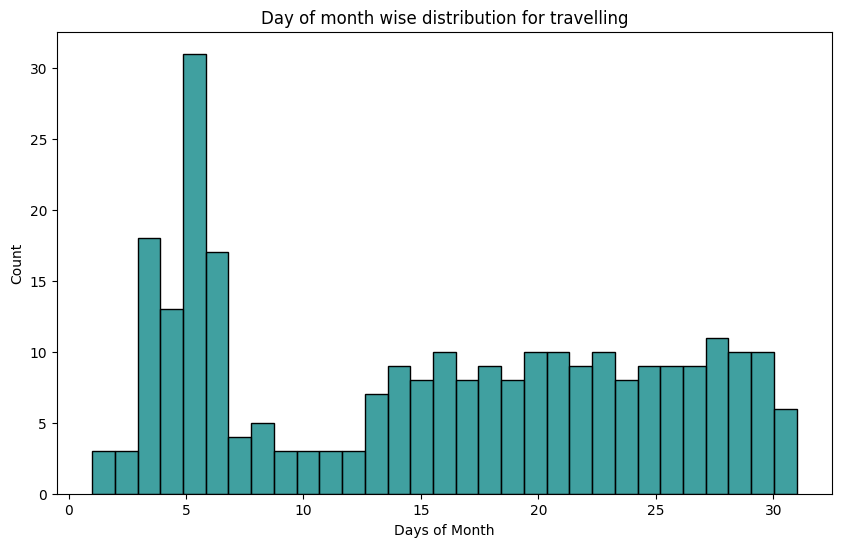

In [332]:
# Chart - 6 visualization code
#Day of Monthwise Distribution of travellers
plt.figure(figsize=(10,6))
sns.histplot(df_copy['travel_day_of_month'],bins=31, color='teal')
plt.title('Day of month wise distribution for travelling')
plt.xlabel('Days of Month')
plt.ylabel('Count')

## Most of the travelling is done before 7th of the month, there seems less travelling done between 7th and 13th fo the month. This can be because of transport holiday during this period of every month.

Text(0.5, 1.0, 'Number of tickets for every day of month')

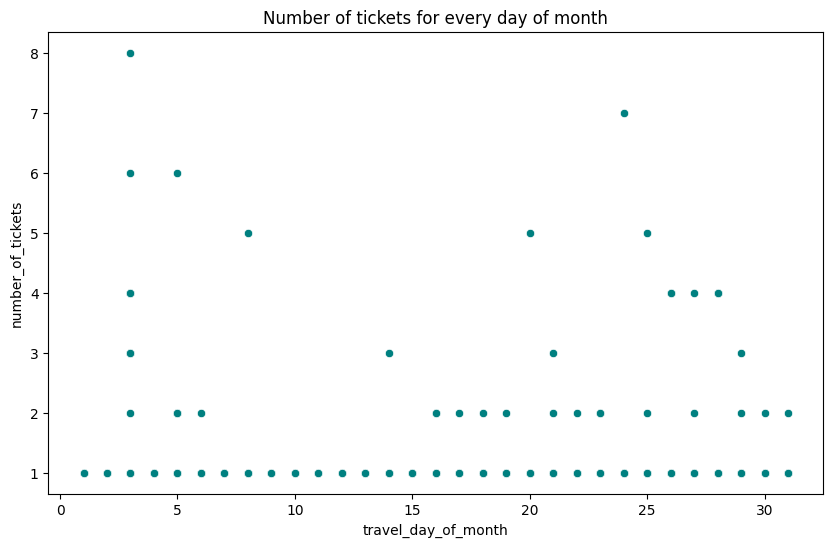

In [333]:
# Chart - 7 visualization code

#Scatterplot of number of tickets sold for everyday of the month
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_copy, x='travel_day_of_month',y='number_of_tickets',color='teal')
plt.title('Number of tickets for every day of month')

### Similar to the above graph, we can see there are less tickets sold between 5th and 11th of every month. Transport may be closed during this period every month because of transport holiday or some other cases.

Text(0, 0.5, 'Count')

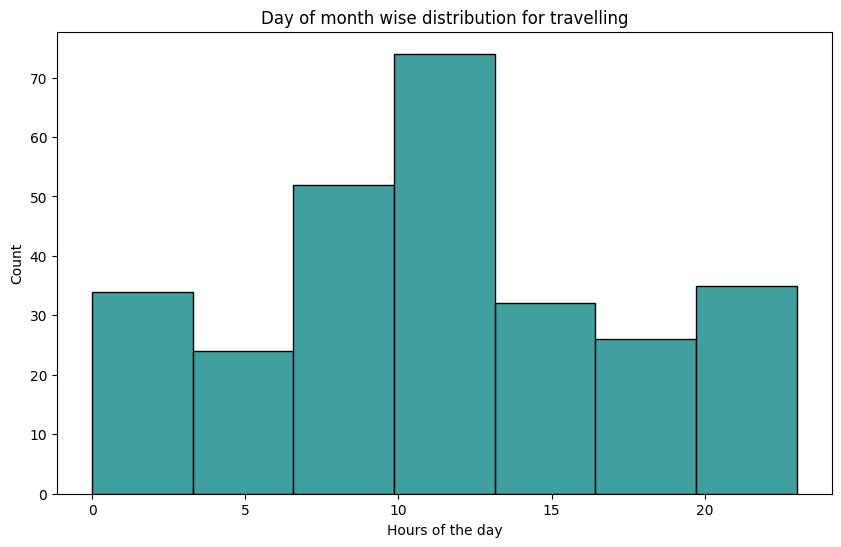

In [334]:
# Chart - 8 visualization code

#Barplot for count in every hour of day.
plt.figure(figsize=(10,6))
sns.histplot(df_copy['travel_hour'],bins=7, color='teal')
plt.title('Day of month wise distribution for travelling')
plt.xlabel('Hours of the day')
plt.ylabel('Count')

Text(0.5, 1.0, 'Number of tickets for each hour of day')

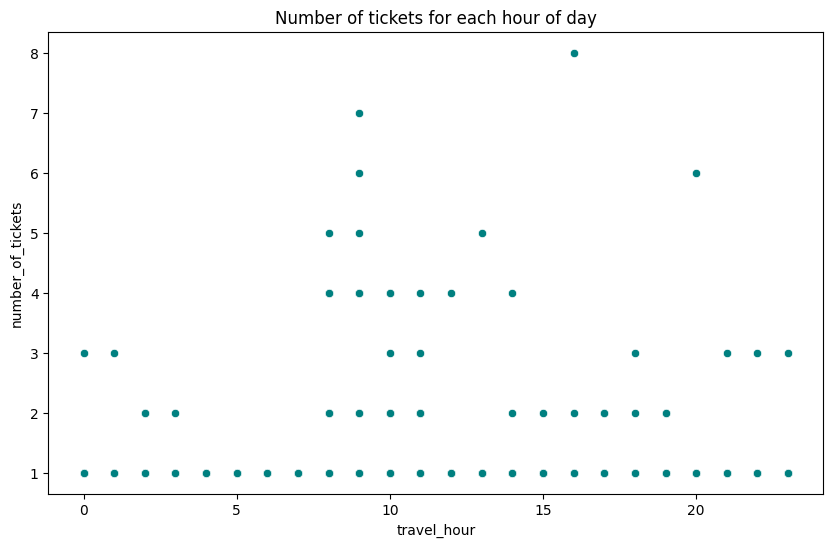

In [335]:
# Chart - 9 visualization code

#Scatterplot for number of tickets in every hour of day.
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_copy, x='travel_hour',y='number_of_tickets',color='teal')
plt.title('Number of tickets for each hour of day')

#### In the day, most tickets are sold at 8AM and close to 6PM. This can be because people going to and returning from work in delhi at these times. Similarly, there are less tickets sold before 8AM

Text(0.5, 1.0, 'Number of tickets for each period of day')

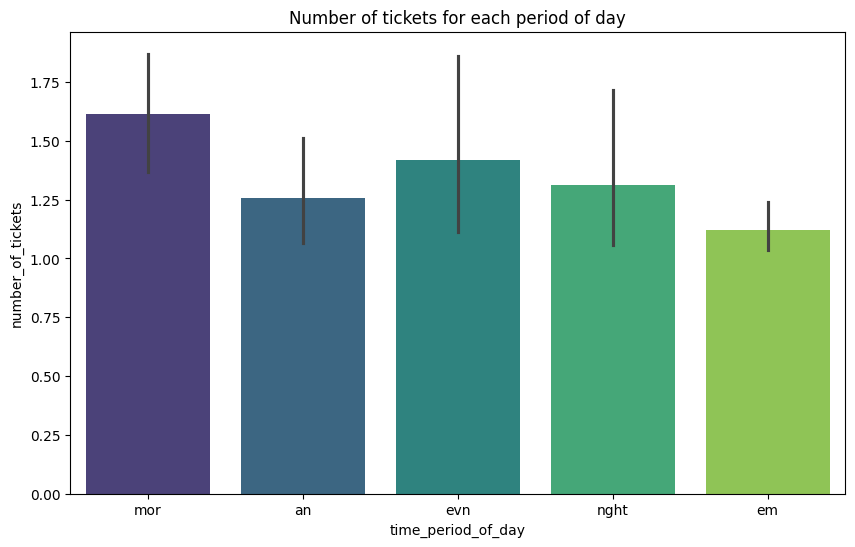

In [336]:
# Chart - 10 visualization code

#Bar chart for Number of tickets for each period of day
plt.figure(figsize=(10,6))
sns.barplot(data=df_copy, x='time_period_of_day',y='number_of_tickets', palette='viridis')
plt.title('Number of tickets for each period of day')

### Most number of tickets are sold in morning and followed by the evening hours

## 1. Feature Manipulation & Selection

In [337]:
df_copy.travel_month.value_counts()

travel_month
5.0     56
4.0     35
6.0     34
2.0     27
3.0     25
7.0     20
8.0     20
1.0     14
11.0    12
10.0    11
12.0    11
9.0     11
Name: count, dtype: int64

In [338]:
df_copy.travel_day_of_year.value_counts()

travel_day_of_year
136.0    4
310.0    3
168.0    3
144.0    3
142.0    3
        ..
270.0    1
206.0    1
53.0     1
19.0     1
173.0    1
Name: count, Length: 182, dtype: int64

In [339]:
df_copy.travel_day_of_month.value_counts()

travel_day_of_month
5.0     31
3.0     18
6.0     17
4.0     13
28.0    11
29.0    10
30.0    10
23.0    10
16.0    10
20.0    10
21.0    10
14.0     9
22.0     9
27.0     9
26.0     9
25.0     9
18.0     9
15.0     8
19.0     8
24.0     8
17.0     8
13.0     7
31.0     6
8.0      5
7.0      4
9.0      3
10.0     3
11.0     3
12.0     3
1.0      3
2.0      3
Name: count, dtype: int64

In [340]:
df_copy.time_period_of_day.value_counts()

time_period_of_day
mor     101
em       58
an       47
evn      36
nght     35
Name: count, dtype: int64

From above 3 value counts, we can see:
1. Some months have higher frequency of travel
1. Some days in year have high frequency of travelers, while others have low frequency. This is because of more traveling being done in some month than others.
2. Some days in a month have high frequeny of travel than others.
3. Some period in the day have high frequency of travel.

To manage this, we will create a dictionary of the frequency for the 4 columns above and create 4 new columns taking log transform for the same.

In [341]:
# Manipulate Features to minimize feature correlation and create new features
period_dict = dict(df_copy.time_period_of_day.value_counts())
df_copy['travel_hour_wise_weights'] = np.log1p(df_copy.time_period_of_day.map(period_dict))

In [342]:
# Creating a seperate column for giving day of a year wise weights for the hours column
day_of_year_dict = dict(df_copy.travel_day_of_year.value_counts())
df_copy['travel_day_of_year_wise_weights'] = np.log1p(df_copy.travel_day_of_year.map(day_of_year_dict))

In [343]:
# Giving weights to the each days of the month based on the frequency of ticket bookings
day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
df_copy['travel_day_of_month_wise_weights'] = df_copy.travel_day_of_month.replace(day_of_month_wise_weights_dict)

In [344]:
# Creating a column for giving weights to the each months of a year based on the frequency of ticket bookings
travel_month_wise_weights_dict = {12: 1,
 2: 1,
 1: 1,
 3: 1,
 4: 1,
 11: 2,
 9: 3,
 7: 3,
 8: 3,
 10: 3,
 6: 3,
 5: 3}
df_copy['travel_month_wise_weights'] = df_copy.travel_month.replace(travel_month_wise_weights_dict)

In [345]:
df_copy.head(5)

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_from_to,number_of_tickets,date_time,...,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day,travel_hour_wise_weights,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights,travel_month_wise_weights
0,1234,2024-02-20,8.0,Mumbai,Delhi,bus,50,Mumbai to Delhi,5,2024-02-20 08:00:00,...,51.0,1.0,8,1.0,0,mor,4.624973,1.098612,3.0,1.0
1,5678,2024-02-22,10.0,Kolkata,Delhi,shuttle,30,Kolkata to Delhi,2,2024-02-22 10:00:00,...,53.0,3.0,10,1.0,0,mor,4.624973,0.693147,4.0,1.0
2,3456,2024-02-26,12.0,Bangalore,Delhi,shuttle,30,Bangalore to Delhi,4,2024-02-26 12:00:00,...,57.0,0.0,12,1.0,0,an,3.871201,1.098612,4.0,1.0
3,7890,2024-02-28,14.0,Hyderabad,Delhi,bus,50,Hyderabad to Delhi,4,2024-02-28 14:00:00,...,59.0,2.0,14,1.0,0,an,3.871201,1.098612,3.0,1.0
4,6789,2024-03-03,16.0,Lucknow,Delhi,bus,50,Lucknow to Delhi,8,2024-03-03 16:00:00,...,63.0,6.0,16,1.0,1,evn,3.610918,0.693147,1.0,1.0


In [346]:
# Creating a method to create new features in df

# Creating columns for time difference between next and previous buses for each of the origin places (travel_from).
def find_difference_bw_bus(data):

  data.sort_values(["travel_from","date_time"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date_time.shift(-1)-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]

  #Handling missing values
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")


  return data

In [347]:
transport_data_new = find_difference_bw_bus(df_copy)

In [348]:
transport_data_new.groupby(["travel_from"]).date_time.shift(-1)

162   2024-07-26 03:00:00
49    2024-08-23 17:00:00
58    2025-11-05 09:45:00
81    2031-01-05 06:15:00
143                   NaT
              ...        
102                   NaT
76                    NaT
98                    NaT
90                    NaT
123                   NaT
Name: date_time, Length: 277, dtype: datetime64[ns]

In [349]:
# Get unique cities from both columns
cities_from = df['travel_from'].unique()
cities_to = df['travel_to'].unique()

# Combine the unique cities from both columns
all_cities = set(cities_from).union(cities_to)

print("All unique cities:", all_cities)

All unique cities: {'Tiruchirappalli', 'Puttaparthi', 'Talacheru', 'Khammam', 'Warangal', 'Chennai', 'Palwancha', 'Patna', 'Srinagar', 'Kurnool', 'Yellandu', 'Mathura', 'Tirupati', 'Kanpur', 'Amaravati', 'Raipur', 'Ranchi', 'New Delhi', 'Ahmedabad', 'Rajahmundry', 'Indore', 'Hindupur', 'Anantapur', 'Tenali', 'Vadodara', 'Bhadrachalam', 'Nagpur', 'Gudivada', 'Pune', 'Nuzvid', 'Guwahati', 'Bandar', 'Kota', 'Kochi', 'Ongole', 'Agra', 'Noida', 'Chittoor', 'Bellary', 'Dausa', 'Jaisalmer', 'Lucknow', 'Surat', 'Ajmer', 'Gwalior', 'Chandigarh', 'Kolkata', 'Faridabad', 'Bhimavaram', 'Mumbai', 'Gorakhpur', 'Dehradun', 'Bhilwara', 'Shimla', 'Ghaziabad', 'Bapatla', 'Vinukonda', 'Guntur', 'Kothagudem', 'Mysuru', 'Cuddapah', 'Tadepalligudem', 'Machavaram', 'Meerut', 'Vijayawada', 'Jodhpur', 'Varanasi', 'Mysore', 'Eluru', 'Madanapalle', 'Bangalore', 'Coimbatore', 'Tonk', 'Machilipatnam', 'Mangalore', 'Jaipur', 'Vizianagaram', 'Bhopal', 'Chintaparru', 'Bikaner', 'Bhubaneswar', 'Kakinada', 'Visakhapatn

In [350]:
transport_data_new[['travel_from','date_time','Time_gap_btw_0_1_next_bus','Time_gap_btw_0_1_previous_bus']].head()

,travel_from,date_time,Time_gap_btw_0_1_next_bus,Time_gap_btw_0_1_previous_bus
162,Agra,2024-04-29 08:50:00,-2106.166667,2106.166667
49,Agra,2024-07-26 03:00:00,-686.000000,2106.166667
58,Agra,2024-08-23 17:00:00,-10528.750000,686.000000
81,Agra,2025-11-05 09:45:00,-45284.500000,10528.750000
143,Agra,2031-01-05 06:15:00,-45284.500000,45284.500000


In [351]:
# Making a dictionary containing distances of originating places from nairobi, taken from google maps
distances_from_delhi = {
    'Tiruchirappalli': 2200,
    'Puttaparthi': 2000,
    'Talacheru': 1300,
    'Khammam': 1300,
    'Warangal': 1200,
    'Chennai': 2200,
    'Palwancha': 1200,
    'Patna': 1000,
    'Srinagar': 800,
    'Kurnool': 1600,
    'Yellandu': 1300,
    'Mathura': 180,
    'Tirupati': 2100,
    'Kanpur': 500,
    'Amaravati': 1600,
    'Raipur': 1100,
    'Ranchi': 1100,
    'Ahmedabad': 900,
    'Rajahmundry': 1600,
    'Indore': 800,
    'Hindupur': 1800,
    'Anantapur': 1800,
    'Tenali': 1700,
    'Vadodara': 900,
    'Bhadrachalam': 1400,
    'Nagpur': 1100,
    'Gudivada': 1700,
    'Pune': 1300,
    'Nuzvid': 1600,
    'Guwahati': 2200,
    'Bandar': 1700,
    'Kota': 250,
    'Kochi': 2200,
    'Ongole': 1500,
    'Agra': 230,
    'Noida': 20,
    'Chittoor': 2100,
    'Bellary': 1700,
    'Dausa': 250,
    'Jaisalmer': 800,
    'Lucknow': 550,
    'Surat': 1000,
    'Ajmer': 350,
    'Gwalior': 350,
    'Chandigarh': 250,
    'Kolkata': 1500,
    'Faridabad': 30,
    'Bhimavaram': 1700,
    'Mumbai': 1400,
    'Gorakhpur': 800,
    'Dehradun': 250,
    'Bhilwara': 500,
    'Shimla': 350,
    'Ghaziabad': 20,
    'Bapatla': 1700,
    'Vinukonda': 1600,
    'Guntur': 1700,
    'Kothagudem': 1300,
    'Mysuru': 1800,
    'Cuddapah': 1600,
    'Tadepalligudem': 1600,
    'Machavaram': 1600,
    'Meerut': 70,
    'Vijayawada': 1600,
    'Jodhpur': 700,
    'Varanasi': 800,
    'Mysore': 1800,
    'Eluru': 1700,
    'Madanapalle': 1900,
    'Bangalore': 1800,
    'Coimbatore': 2100,
    'Tonk': 350,
    'Machilipatnam': 1700,
    'Mangalore': 2000,
    'Jaipur': 300,
    'Vizianagaram': 1700,
    'Bhopal': 700,
    'Chintaparru': 1700,
    'Bikaner': 700,
    'Bhubaneswar': 1300,
    'Kakinada': 1700,
    'Visakhapatnam': 1800,
    'Nellore': 1500,
    'Sikar': 300,
    'Narasaraopet': 1600,
    'Sattupalli': 1300,
    'Sawai Madhopur': 350,
    'Udaipur': 350,
    'Amritsar': 450,
    'Gangtok': 1300,
    'Peanur': 1700,
    'Repalle': 1600,
    'Hyderabad': 1400,
    'Chittorgarh': 350,
    'Haryana': 30 
}

transport_data_new['distance_to_destination'] = transport_data_new['travel_from'].map(distances_from_delhi)

In [352]:
transport_data_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'travel_to',
       'car_type', 'max_capacity', 'travel_from_to', 'number_of_tickets',
       'date_time', 'travel_month', 'travel_year', 'travel_day_of_month',
       'travel_day_of_year', 'travel_day_of_week', 'travel_hour', 'quarter',
       'is_weekend', 'time_period_of_day', 'travel_hour_wise_weights',
       'travel_day_of_year_wise_weights', 'travel_day_of_month_wise_weights',
       'travel_month_wise_weights', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus',
       'distance_to_destination'],
      dtype='object')

In [353]:
# Handling Missing Values & Missing Value Imputation
transport_data_new.isnull().sum()

ride_id                               0
travel_date                           1
travel_time                           0
travel_from                           0
travel_to                             0
car_type                              0
max_capacity                          0
travel_from_to                        0
number_of_tickets                     0
date_time                             1
travel_month                          1
travel_year                           1
travel_day_of_month                   1
travel_day_of_year                    1
travel_day_of_week                    1
travel_hour                           0
quarter                               1
is_weekend                            0
time_period_of_day                    0
travel_hour_wise_weights              0
travel_day_of_year_wise_weights       1
travel_day_of_month_wise_weights      1
travel_month_wise_weights             1
Time_gap_btw_0_1_next_bus            60
Time_gap_btw_0_1_previous_bus        60


In [354]:
transport_data_new.dropna(inplace=True)

### Multicollinearity

In [355]:
print(transport_data_new.dtypes)

ride_id                                      int64
travel_date                         datetime64[ns]
travel_time                                float64
travel_from                                 object
travel_to                                   object
car_type                                    object
max_capacity                                 int64
travel_from_to                              object
number_of_tickets                            int64
date_time                           datetime64[ns]
travel_month                               float64
travel_year                                float64
travel_day_of_month                        float64
travel_day_of_year                         float64
travel_day_of_week                         float64
travel_hour                                  int32
quarter                                    float64
is_weekend                                   int64
time_period_of_day                          object
travel_hour_wise_weights       

In [356]:
temp = transport_data_new.copy()

In [363]:
temp['travel_from'] = pd.Categorical(temp['travel_from']).codes
temp['travel_to'] = pd.Categorical(temp['travel_to']).codes
temp['car_type'] = pd.Categorical(temp['car_type']).codes
temp['travel_from_to'] = pd.Categorical(temp['travel_from_to']).codes
temp['time_period_of_day'] = pd.Categorical(temp['time_period_of_day']).codes

In [364]:
print(temp.dtypes)

ride_id                                      int64
travel_date                         datetime64[ns]
travel_time                                float64
travel_from                                   int8
travel_to                                     int8
car_type                                      int8
max_capacity                                 int64
travel_from_to                                int8
number_of_tickets                            int64
date_time                           datetime64[ns]
travel_month                               float64
travel_year                                float64
travel_day_of_month                        float64
travel_day_of_year                         float64
travel_day_of_week                         float64
travel_hour                                  int32
quarter                                    float64
is_weekend                                   int64
time_period_of_day                            int8
travel_hour_wise_weights       

<Axes: >

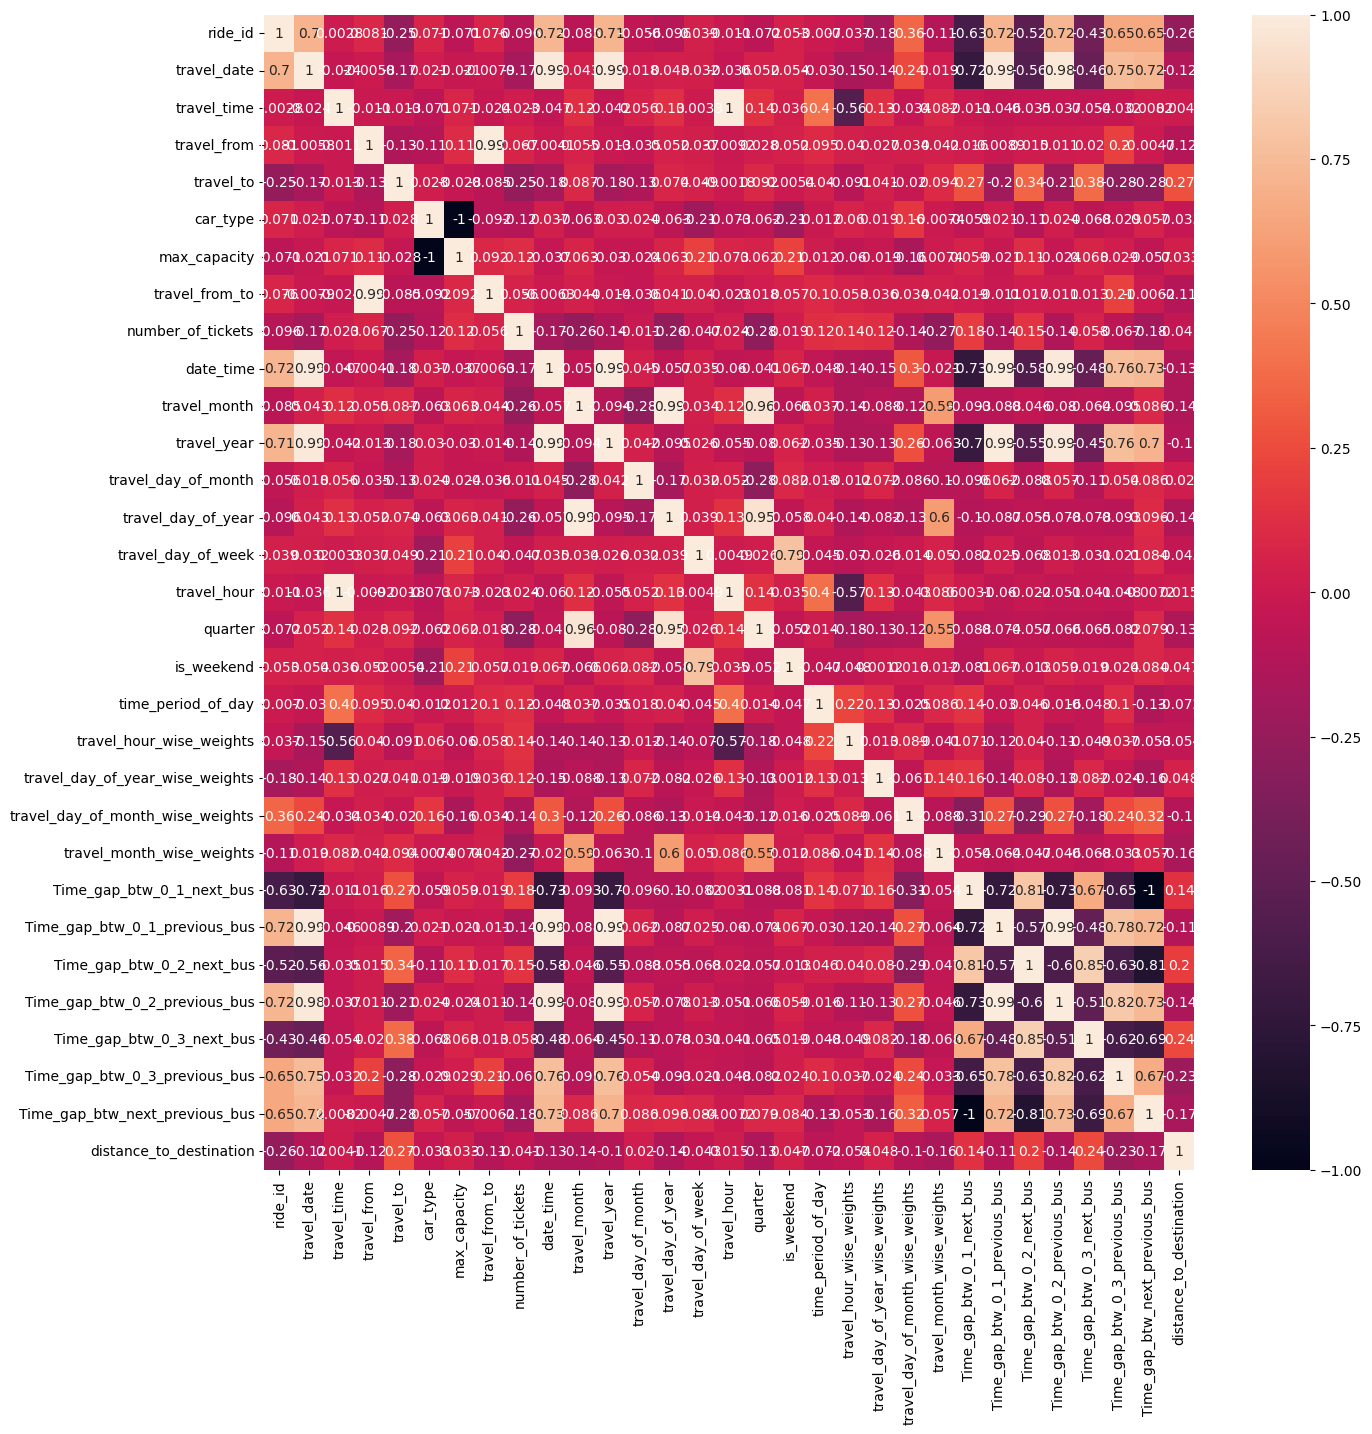

In [366]:
plt.figure(figsize=(15,15))
sns.heatmap(temp.corr(),annot=True)

Many columns have correlation with newly formed features. Hence columns like travel_month, travel_day_of_year, travel_day_of_month, etc. will be dropped because we have already created new weighted columns for these.

## ***Categorical Encoding + Data Splitting***

In [380]:
# Encode your categorical columns
from sklearn import preprocessing
final_df = pd.get_dummies(temp, columns = ['travel_from','travel_day_of_month_wise_weights','travel_month_wise_weights'])

In [381]:
#Label encoding car_type column
label_encoder = {'Bus':1,'shuttle':0}
final_df.replace(label_encoder, inplace=True)
final_df.head()

,ride_id,travel_date,travel_time,travel_to,car_type,max_capacity,travel_from_to,number_of_tickets,date_time,travel_month,...,travel_day_of_month_wise_weights_5.0,travel_day_of_month_wise_weights_6.0,travel_day_of_month_wise_weights_7.0,travel_day_of_month_wise_weights_8.0,travel_day_of_month_wise_weights_9.0,travel_day_of_month_wise_weights_10.0,travel_day_of_month_wise_weights_11.0,travel_month_wise_weights_1.0,travel_month_wise_weights_2.0,travel_month_wise_weights_3.0
162,1112,2024-04-29,8.83,1,1,30,1,1,2024-04-29 08:50:00,4.0,...,False,False,False,False,False,False,False,True,False,False
49,6780,2024-07-26,3.00,1,1,30,0,1,2024-07-26 03:00:00,7.0,...,False,False,False,False,False,False,False,False,False,True
58,6782,2024-08-23,17.00,1,1,30,0,1,2024-08-23 17:00:00,8.0,...,False,False,False,False,False,False,False,False,False,True
81,30021,2025-05-11,9.75,1,1,30,0,1,2025-11-05 09:45:00,5.0,...,False,False,False,False,False,False,True,False,False,True
143,49089,2031-05-01,6.25,1,1,30,0,1,2031-01-05 06:15:00,5.0,...,False,False,False,False,False,False,False,False,False,True


We have done one hot encoding on few categorical features, where label encoding on car_type

### Data Splitting

In [382]:
#Seperating target variable and indpendent features variable
cols_to_drop = ['ride_id','travel_date','travel_time','max_capacity','travel_year','number_of_tickets','time_period_of_day','date_time','travel_month','travel_day_of_month','travel_day_of_year','travel_hour']
X = final_df.drop(cols_to_drop,axis=1)
X.shape

(135, 45)

In [383]:
#Target Variable
y = final_df['number_of_tickets'].values
y.shape

(135,)

In [384]:
# Split your data to train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [385]:
X_train.shape

(108, 45)

In [386]:
y_train.shape

(108,)

# ***ML Model Implementation***

In [387]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
import math

In [388]:
#Creating function for evaluation metrics
def evaluate_metric(actual,predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  print('R2 Score is {}'.format(r2_score(actual, predicted)))

### Model - 1 : Linear Regression

In [389]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(X_train,y_train)
# Predict on the model

y_train_pred = regressor.predict(X_train)

y_test_pred = regressor.predict(X_test)

In [390]:
# Visualizing evaluation Metric Score chart

#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 0.7220812178745715
RMSE is 0.8497536218661098
MAE is 0.6343775406313408
MAPE is 45.19240580927678
R2 Score is 0.6240523445391688
Adjusted R2 :  0.35118711073695263


In [391]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 1.5849439820364606
RMSE is 1.2589455834294272
MAE is 1.0173052551236172
MAPE is 89.11123962816366
R2 Score is -2.056677679641745
Adjusted R2 :  5.182822087930809


Linear Regression is not giving good results on data, hence trying regularized linear regression models

### Model - 2 : Lasso

In [392]:
# ML Model - 2 Implementation
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

# Fit the Algorithm
lasso.fit(X_train, y_train)

# Predict on the model
y_train_pred = lasso.predict(X_train)

y_test_pred = lasso.predict(X_test)

In [393]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 1.471817096323393
RMSE is 1.213184691761066
MAE is 0.7797963415971381
MAPE is 48.47225136206976
R2 Score is 0.23370644058759749
Adjusted R2 :  -0.3224743686633398


In [394]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 0.6010594244700778
RMSE is 0.7752802231903493
MAE is 0.6097942149001943
MAPE is 48.7307872913546
R2 Score is -0.15918603290657862
Adjusted R2 :  2.5862545713458447


Cross- Validation & Hyperparameter Tuning

In [396]:
from sklearn.model_selection import GridSearchCV

In [397]:
# ML Model - 2 Implementation with hyperparameter optimization techniques
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
lasso_regressor.fit(X, y)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

# Predict on the model
y_train_pred = lasso_regressor.predict(X_train)

y_test_pred = lasso_regressor.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -1.7251519486893017


In [398]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 1.8412207277368307
RMSE is 1.3569158882321448
MAE is 0.8397340768830416
MAPE is 48.78996937298816
R2 Score is 0.04137845072881363
Adjusted R2 :  -0.6543952543873701


In [399]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 0.4696770554732381
RMSE is 0.6853298880635793
MAE is 0.6001083063816357
MAPE is 50.20928486909655
R2 Score is 0.09419425015875504
Adjusted R2 :  2.239523657677493


GridSearchCV is used to tune hyperparameter, The best fit alpha value is found out to be : {'alpha': 0.01}


The model has accuracy has decreased overall and does not give good results.

### Model - 3 : Ridge

In [400]:
# ML Model - 3 Implementation
ridge = Ridge()

# Fit the Algorithm
ridge.fit(X_train,y_train)

# Predict on the model
y_train_pred = ridge.predict(X_train)

y_test_pred = ridge.predict(X_test)

In [401]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 0.7744422060434549
RMSE is 0.8800239803797706
MAE is 0.6316642359485528
MAPE is 43.419835484379604
R2 Score is 0.5967908810743714
Adjusted R2 :  0.3041391012089958


In [402]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 1.269091505113658
RMSE is 1.1265396154213387
MAE is 0.9482075237210837
MAPE is 84.88622096994418
R2 Score is -1.4475336170049116
Adjusted R2 :  4.3492565285330365


Cross- Validation & Hyperparameter Tuning

In [403]:
# ML Model - 3 Implementation with hyperparameter optimization techniques
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
ridge_regressor.fit(X,y)

# Predict on the model
y_train_pred = ridge_regressor.predict(X_train)

y_test_pred = ridge_regressor.predict(X_test)

In [404]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 1.3963514572274907
RMSE is 1.1816731600690145
MAE is 0.7019980944022836
MAPE is 40.85940840266822
R2 Score is 0.2729972147881333
Adjusted R2 :  -0.2546660970591892


In [405]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 0.38203140671674807
RMSE is 0.6180868925294792
MAE is 0.5095438239979673
MAPE is 42.877982742304646
R2 Score is 0.2632251441891287
Adjusted R2 :  2.008218223741192


GridSearchCV is used to tune hyperparameter, The best fit alpha value is found out to be : {'alpha': 1}

GridSearchCV has little effect on L2 Regression, has not changed the model accuracy much and overfitting still exists.

### Model - 4 : Random Forest

In [406]:
# ML Model - 4 Implementation
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

# Fit the Algorithm
rfr.fit(X_train,y_train)

# Predict on the model
y_train_pred = rfr.predict(X_train)

y_test_pred = rfr.predict(X_test)

In [407]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 0.19897685185185182
RMSE is 0.4460682143482674
MAE is 0.23490740740740737
MAPE is 13.9364417989418
R2 Score is 0.8964037852073383
Adjusted R2 :  0.8212129841481484


In [408]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 0.300737037037037
RMSE is 0.5483949644526626
MAE is 0.35518518518518516
MAPE is 28.817901234567906
R2 Score is 0.4200071428571429
Adjusted R2 :  1.7936744360902255


Cross- Validation & Hyperparameter Tuning

In [409]:
# ML Model - 4 Implementation with hyperparameter optimization techniques
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 100, num = 4)]
max_depth.append(None)

# Create the parameters grid
grid_params_dict = {'n_estimators': n_estimators,
               'max_depth': max_depth
                    }
print(grid_params_dict)


rfr = RandomForestRegressor()

# Grid Search of parameters, using 3 fold cross validation,
rf_gridCV = GridSearchCV(estimator = rfr, param_grid = grid_params_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Algorithm
rf_gridCV.fit(X,y)


print(rf_gridCV.best_params_)

{'n_estimators': [400, 600, 800, 1000], 'max_depth': [40, 60, 80, 100, None]}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'max_depth': 60, 'n_estimators': 600}


In [410]:
rf_gridCV.best_estimator_

RandomForestRegressor(max_depth=60, n_estimators=600)

In [411]:
#Taking best params and creating a new regressor
rf_grid_optimal_model =rf_gridCV.best_estimator_

# Predict on the model
y_train_pred = rf_grid_optimal_model.predict(X_train)

y_test_pred = rf_grid_optimal_model.predict(X_test)

In [412]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 0.1750390174897119
RMSE is 0.4183766454879047
MAE is 0.21091049382716046
MAPE is 11.582328409758967
R2 Score is 0.9088668883631656
Adjusted R2 :  0.8427218879815923


In [413]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 0.036081584362139936
RMSE is 0.18995153161304054
MAE is 0.1208024691358025
MAPE is 9.545781893004115
R2 Score is 0.9304140873015873
Adjusted R2 :  1.0952228279030911


GridSearchCV is used to tune hyperparameter, The best hyperparameter values are:
{'max_depth': 60, 'n_estimators': 400}

By using GridSearchCV, the training accuracy have increase slightly, but the test accuracy has increased a lot, hence, the problem of overfitting which was faced in train_test_split method is removed.

### Model - 5 : XGBoost

In [414]:
# ML Model - 5 Implementation
import xgboost as xgb
xgbr = xgb.XGBRegressor()

# Fit the Algorithm
xgbr.fit(X_train,y_train)

# Predict on the model
y_train_pred = xgbr.predict(X_train)

y_test_pred = xgbr.predict(X_test)

In [415]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 1.1558825475367063e-06
RMSE is 0.0010751197828784969
MAE is 0.0007184158872675012
MAPE is 0.05787754815722268
R2 Score is 0.9999994039535522
Adjusted R2 :  0.999998971339195


In [416]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 0.34583734434141783
RMSE is 0.5880793690833048
MAE is 0.3038486727961787
MAPE is 24.953253990338172
R2 Score is 0.33302783966064453
Adjusted R2 :  1.912698745727539


Looks like the model causes overfitting, hence trying hyperparameter tuning.

Cross- Validation & Hyperparameter Tuning

In [417]:
# ML Model - 5 Implementation with hyperparameter optimization techniques
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

max_depth= [6, 8, 10, 12]
min_child_weight= [7, 8, 10, 12]

# Create the random grid
xgb_grid_params_dict = {
         'max_depth': max_depth,
         'min_child_weight': min_child_weight
                         }
print(xgb_grid_params_dict)


xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state = 3)

# Grid Search of parameters, using 3 fold cross validation,
xgbr_grid = GridSearchCV(estimator = xgbr, param_grid = xgb_grid_params_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Algorithm
xgbr_grid.fit(X,y)


print(xgbr_grid.best_params_)

{'max_depth': [6, 8, 10, 12], 'min_child_weight': [7, 8, 10, 12]}
Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'max_depth': 6, 'min_child_weight': 12}


In [418]:
xgbr_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=12, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=3, ...)

In [419]:
#Taking best params and creating a new regressor
xgbr_optimal_model =xgbr_grid.best_estimator_

# Predict on the model
y_train_pred = xgbr_optimal_model.predict(X_train)

y_test_pred = xgbr_optimal_model.predict(X_test)

In [420]:
#Train data evaluation
evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 0.004896452550449389
RMSE is 0.06997465648682663
MAE is 0.04536100007869579
MAPE is 2.9976841281751265
R2 Score is 0.9974507093429565
Adjusted R2 :  0.9956004177370379


In [421]:
#Test data evaluation
evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 0.004536028149469657
RMSE is 0.06735004194111283
MAE is 0.04241709576712714
MAPE is 3.359569590768696
R2 Score is 0.9912519454956055
Adjusted R2 :  1.011971021953382


GridSearchCV is used to tune hyperparameter, The best fit values are found out to be : {'max_depth': 6, 'min_child_weight': 8}

By using GridSearchCV, the training accuracy have increase slightly, but the test accuracy has increased a lot, hence, the problem of overfitting which was faced in train_test_split method is removed.

### Evaluation metrics considered for a positive business impact and why?

The following evalutation metrics were chosen:
1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Mean Absolute Error (MAE)
4. Mean Absolute Percentage Error (MAPE)
5. R2 Score
6. Adjusted R2 Score

### ML model chosen from the above created models as final prediction model and why?

Final Prediction Model : XG Boost (GridSearchCV) (Params: {'max_depth': 6, 'n_estimators': 8} )

Performance on test data:
- R2 Score : 0.99
- Adjusted R2 :  1.0

# **Conclusion**

- In this project, we have used different regression models to predict transport demand from various places to delhi.
- Using the data, we have created the target variable and several other features that contribute to our model performance.
- We have used regression models including:
  - Linear Models : Linear Regression, Lasso (L1), Ridge (L2)
  - Non Linear Models: Random Forest, XGBoost.

  We have also performed hyperparameter tuning to improve the performance of these models.
- Out of all these models, the hyperparameter tuned XGBoost gives the best result with an accuracy of around 99%.